# Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Split into features and Target

In [40]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1]

In [42]:
a = y.value_counts()

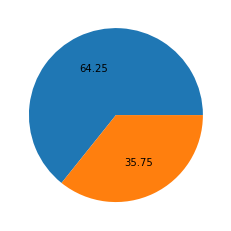

In [44]:
plt.pie(a,autopct="%0.2f")
plt.show()

# Features scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train Test Spliting

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

# Model fitting

In [1]:
from sklearn.svm import SVC

In [107]:
svm_model = SVC(C=10000,random_state=0,kernel="rbf",gamma="auto")
svm_model.fit(X_train,y_train)

SVC(C=10000, gamma='auto', random_state=0)

# Accuracy testing

In [108]:
y_pred = svm_model.predict(X_test)
y_pred1 = svm_model.predict(X_train)

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [110]:
accuracy_score(y_test,y_pred)

0.94

In [111]:
accuracy_score(y_train,y_pred1)

0.9266666666666666

In [112]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[68,  2],
       [ 4, 26]], dtype=int64)

In [113]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.93      0.87      0.90        30

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



# Finding best c value

In [118]:
c = [1,10,100,1000,10000,100000,1000000]

acc_test = []
acc_train = []

for i in c:
    model = SVC(C=i,random_state=0,kernel="rbf",gamma="auto")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a_test = accuracy_score(y_test,y_pred)
    acc_test.append(a_test)
    
    y_pred1 = model.predict(X_train)
    a_train = accuracy_score(y_train,y_pred1)
    acc_train.append(a_train)

In [119]:
acc_test

[0.94, 0.94, 0.91, 0.91, 0.94, 0.91, 0.91]

In [120]:
acc_train

[0.9,
 0.9166666666666666,
 0.9166666666666666,
 0.92,
 0.9266666666666666,
 0.9466666666666667,
 0.9533333333333334]

In [121]:
print("Best Panalty parameter is: ",10000)

Best Panalty parameter is:  10000


# Model Visualization

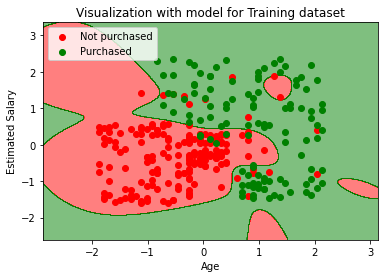

In [114]:
#Visualization for training dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

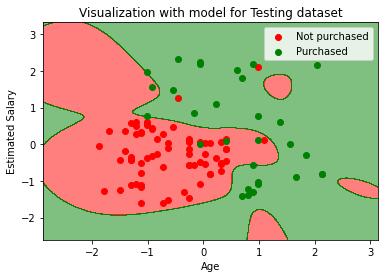

In [115]:
#Visualization for testing dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Testing dataset")
plt.show()

# User Testing

In [65]:
def prediction(age,salary):
    user = np.array([[age,salary]])
    new_user = sc.transform(user)
    user_pred = svm_model.predict(new_user)
    
    if int(user_pred)==0:
        return "Person don't have a car"
    else:
        return "Person have a car"

In [66]:
prediction(50,80000)

'Person have a car'